# Laboratorio 9 - Deep Learning

Autores

- Angel Higueros 20460
- Fredy Velasquez 2010111

### Task 1 - Práctica

1. Preparacion de datos

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, GRU, Conv1D, Dropout, BatchNormalization, Input, Flatten


In [3]:
def load_data(file_path):
    try:
        loaded_data = pd.read_csv(file_path)
        return loaded_data
    except FileNotFoundError:
        print("El archivo especificado no se encontró.")
        return None

def check_nulls(df):
    if df is not None:
        null_counts = df.isna().sum()
        if null_counts.any():
            print("Valores nulos encontrados:")
            print(null_counts)
        else:
            print("No se encontraron valores nulos.")
    else:
        print("No se proporcionó DataFrame para verificar valores nulos.")

def count_records(df):
    if df is not None:
        num_records = df.shape[0]  # 0 para filas, 1 para columnas
        print(f"El DataFrame contiene {num_records} registros.")
    else:
        print("No se proporcionó DataFrame para contar registros.")

file_path = "./demand-forecasting-kernels-only/train.csv"
dataset = load_data(file_path)

check_nulls(dataset)
count_records(dataset)  # Llamada a la nueva función para contar registros


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [16]:
data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [17]:
data.corr()


<ipython-input-17-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,store,item,sales
store,1.000000e+00,7.276042e-15,-0.008170
item,7.276042e-15,1.000000e+00,-0.055998
sales,-8.170361e-03,-5.599807e-02,1.000000


In [5]:
# Verificando valores nulos
print(data.isnull().sum())

date     0
store    0
item     0
sales    0
dtype: int64


In [ ]:
#Mas info de mi data
print(dataset['date'].dtype)
print(dataset['date'].describe())


In [6]:
# Convertir la columna 'date' a datetime
data['date'] = pd.to_datetime(data['date'])

# Escalado de la columna 'sales'
scaler = MinMaxScaler(feature_range=(0, 1))
data['sales'] = scaler.fit_transform(data[['sales']])

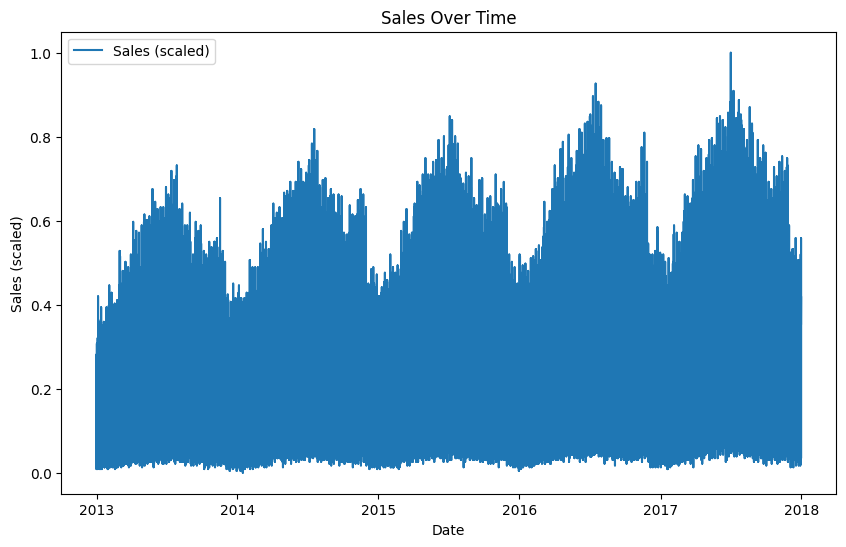

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de que tus datos estén ordenados por fecha si no lo están ya
data = data.sort_values('date')

# Crear un gráfico de líneas de ventas a lo largo del tiempo
plt.figure(figsize=(10,6))  # cambiar el tamaño del gráfico según sea necesario
plt.plot(data['date'], data['sales'], label='Sales (scaled)')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales (scaled)')
plt.legend()
plt.show()


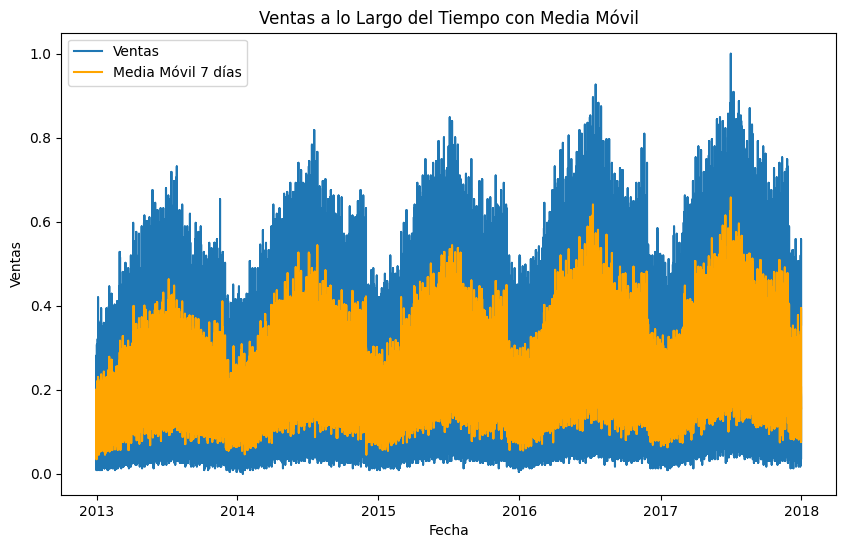

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que tus datos estén ordenados por fecha si no lo están ya
data = data.sort_values('date')

# Calcula el promedio móvil
data['rolling_mean'] = data['sales'].rolling(window=7).mean()  # ventana de 7 días

plt.figure(figsize=(10,6))
plt.plot(data['date'], data['sales'], label='Ventas')
plt.plot(data['date'], data['rolling_mean'], label='Media Móvil 7 días', color='orange')
plt.title('Ventas a lo Largo del Tiempo con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()


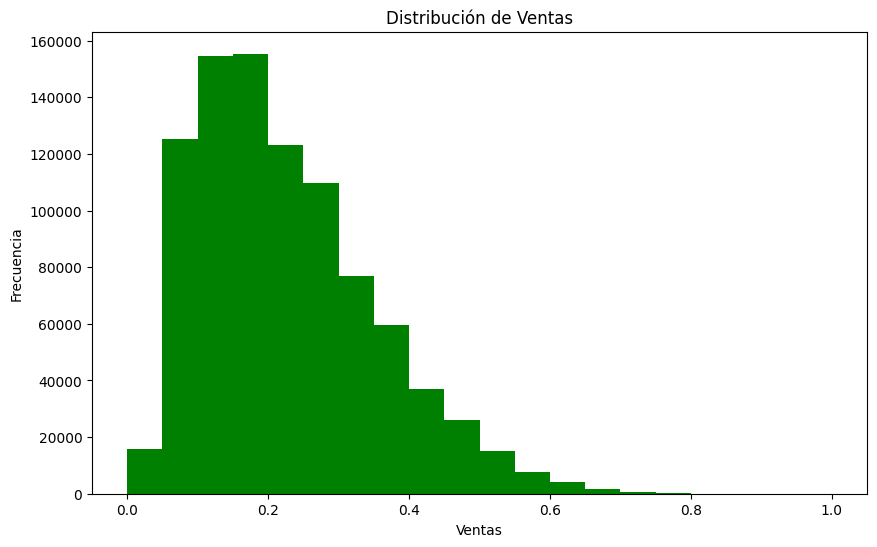

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data['sales'], bins=20, color='green')
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()


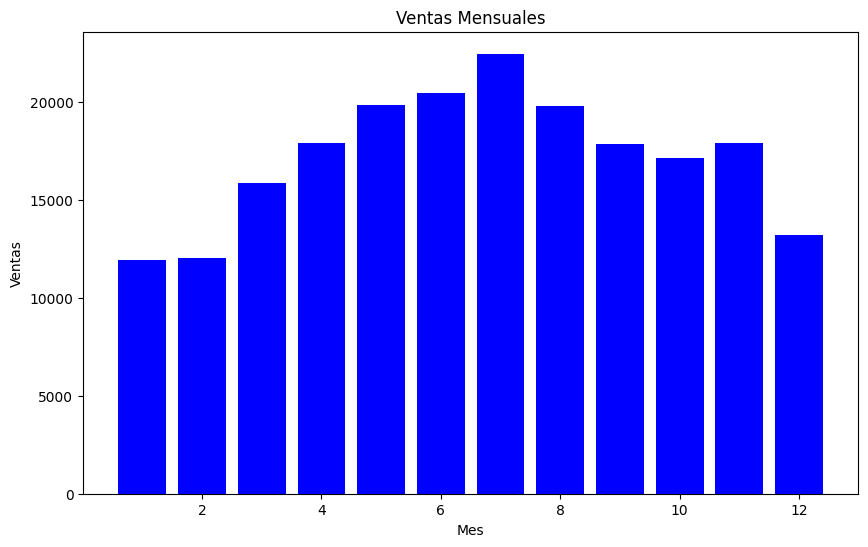

In [ ]:
# Extrae el mes y luego agrupa las ventas por mes
data['month'] = pd.to_datetime(data['date']).dt.month  # extrae el mes
monthly_sales = data.groupby('month')['sales'].sum().reset_index()

plt.figure(figsize=(10,6))
plt.bar(monthly_sales['month'], monthly_sales['sales'], color='blue')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()


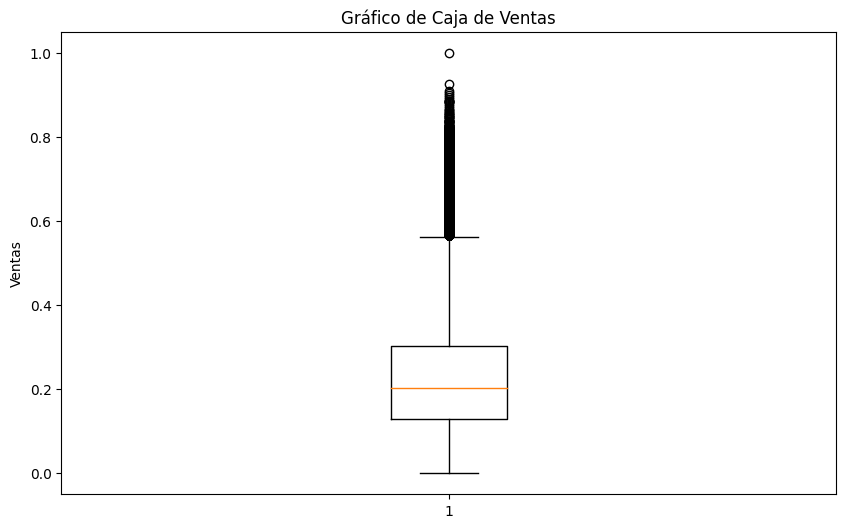

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(data['sales'])
plt.title('Gráfico de Caja de Ventas')
plt.ylabel('Ventas')
plt.show()


2. Preparacion de datos

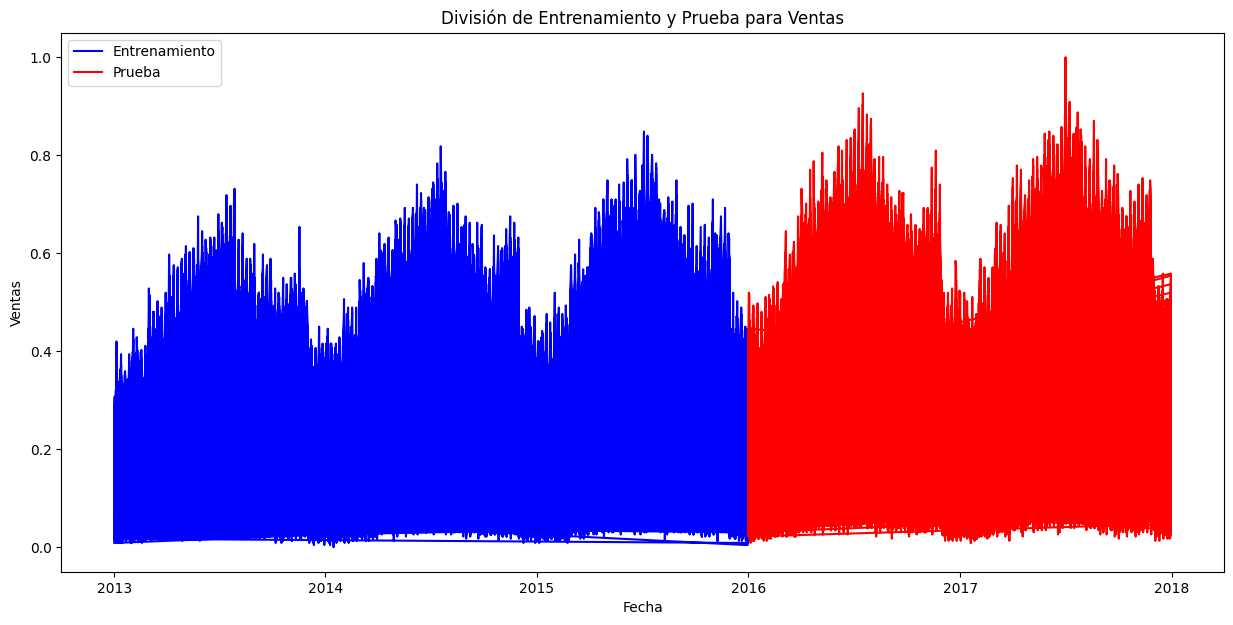

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que 'data' es tu DataFrame y ya has realizado la limpieza y escalado necesario.
# Además, asegúrate de que 'date' es una columna datetime si aún no lo es.
data['date'] = pd.to_datetime(data['date'])

# División de datos en entrenamiento y prueba basada en la fecha.
train_data = data[data['date'] < '2016-01-01']
test_data = data[data['date'] >= '2016-01-01']

# Crear figuras y ejes
fig, ax = plt.subplots(figsize=(15,7))

# Gráfico para datos de entrenamiento
ax.plot(train_data['date'], train_data['sales'], label='Entrenamiento', color='blue')

# Gráfico para datos de prueba
ax.plot(test_data['date'], test_data['sales'], label='Prueba', color='red')

# Etiquetas y leyenda
ax.set_title('División de Entrenamiento y Prueba para Ventas')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas')
ax.legend()

plt.show()



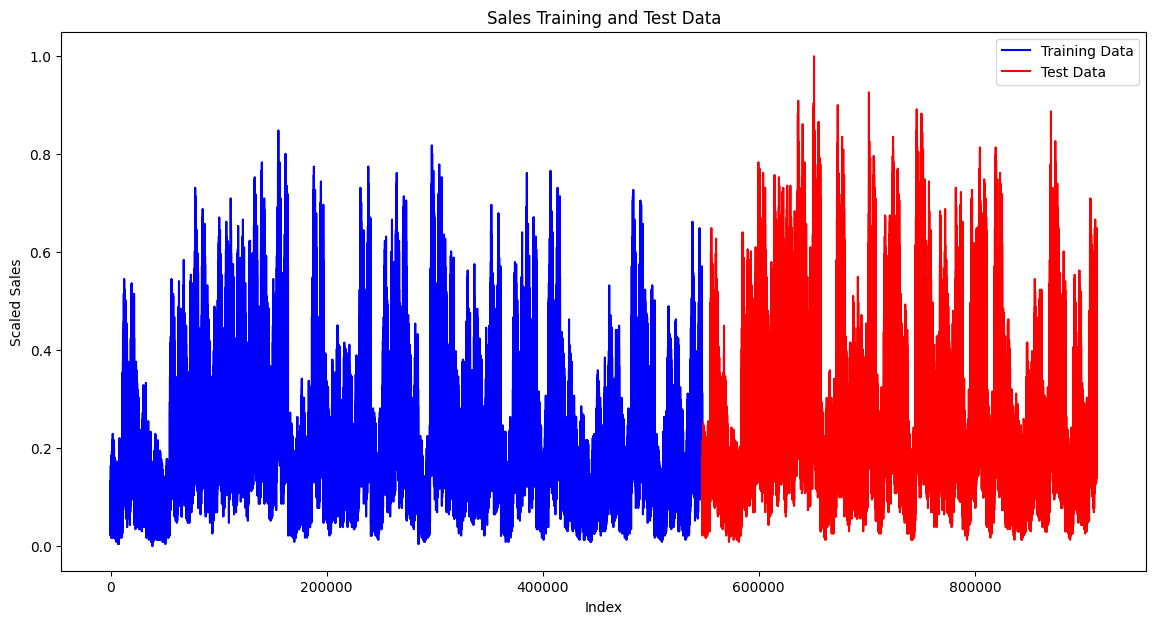

In [20]:
import matplotlib.pyplot as plt

# Crear índices para el eje x, que son simplemente números enteros secuenciales
train_index = range(len(train_data))
test_index = range(len(train_data), len(train_data) + len(test_data))

plt.figure(figsize=(14,7))

# Graficar datos de entrenamiento
plt.plot(train_index, train_data, label='Training Data', color='blue')

# Graficar datos de prueba
plt.plot(test_index, test_data, label='Test Data', color='red')

plt.title('Sales Training and Test Data')
plt.xlabel('Index')
plt.ylabel('Scaled Sales')
plt.legend()
plt.show()


In [7]:
import matplotlib.pyplot as plt

# 1. Convertir 'date' a datetime y verificar
data['date'] = pd.to_datetime(data['date'])
if data['date'].isnull().any():
    print("Hay fechas faltantes o en formato incorrecto.")
    # Puedes añadir código para manejar estas fechas si es necesario

# 2. Ordenar los datos por 'date'
data = data.sort_values(by='date')

# 3. Manejar valores faltantes en 'sales'
if data['sales'].isnull().any():
    # Imputar con la media, mediana, o cualquier otro método que prefieras
    data['sales'].fillna(data['sales'].median(), inplace=True)

# 4. Desglosar fecha en componentes
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Separar en conjuntos de entrenamiento y prueba
train_data = data.loc[data['date'] < '2016-01-01', 'sales'].values
test_data = data.loc[data['date'] >= '2016-01-01', 'sales'].values

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def create_sequences(data, window_size, stride=1, future_gap=1):
    """
    Crea secuencias a partir de datos de series temporales.
    """
    
    if window_size <= 0 or stride <= 0 or future_gap <= 0:
        raise ValueError("window_size, stride y future_gap deben ser mayores que 0")
    
    X, y = [], []
    for i in range(0, len(data) - window_size - future_gap + 1, stride):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size + future_gap - 1, 0])
    
    return np.array(X), np.array(y)

data = np.random.rand(100, 1) 
window_size = 5
X, y = create_sequences(data, window_size, stride=2, future_gap=2)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def create_sequences(data, window_size, stride=1, future_gap=1):
    """
    Crea secuencias a partir de los datos para entrenar modelos de series temporales.
    """
    X, y = [], []
    for i in range(0, len(data) - window_size - future_gap + 1, stride):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size+future_gap-1])
    return np.array(X), np.array(y)

def inverse_transform(y, scaler):
    """Des-normaliza los datos si se han escalado previamente."""
    return scaler.inverse_transform(y)

def plot_sequence(sequence, y=None):
    """Visualiza una secuencia de entrada."""
    plt.figure(figsize=(8, 6))
    plt.plot(sequence, label="Secuencia de entrada")
    if y is not None:
        plt.scatter(len(sequence), y, color='red', label="Valor a predecir")
    plt.legend()
    plt.show()

# Configurar el tamaño de la ventana y otros parámetros
window_size = 40
stride = 2  
future_gap = 2  

# Crear secuencias para entrenamiento y prueba
X_train, y_train = create_sequences(train_data, window_size, stride, future_gap)
X_test, y_test = create_sequences(test_data, window_size, stride, future_gap)

# Validación adicional: verificar que la salida y no está fuera de rango
if len(y_train) == 0 or len(y_test) == 0:
    raise ValueError("No se pudieron crear secuencias. Ajusta los parámetros.")

# Verificar que las dimensiones de los datos son consistentes
if X_train.shape[0] != y_train.shape[0] or X_test.shape[0] != y_test.shape[0]:
    raise ValueError("Inconsistencia en las dimensiones de los datos y las etiquetas")

#Re shape qui
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], -1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], -1))

# Dividir los datos de entrenamiento para crear un conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Visualizar una muestra de secuencia de entrenamiento
sample_index = 5 
plot_sequence(X_train[sample_index], y_train[sample_index])


3. Seleccion de modelo

Se utilizara una combinación de capas convolucionales (Conv1D), recurrentes (GRU) y capas densas para predecir series temporales.

A continuación se detalla la arquitectura del modelo:

Capa de Entrada (Input): Esta capa define la forma de entrada del modelo y, en este caso, se espera que el modelo reciba datos en la forma (pasos_temporales, características).

Conv1D (Conv1D): Una capa convolucional unidimensional diseñada para secuencias. Esta capa extrae características locales de los datos. En este caso, tiene 64 filtros y un tamaño de kernel de 3.

Dropout (Dropout): Las capas de dropout ayudan a evitar el sobreajuste (overfitting) al apagar aleatoriamente ciertas neuronas durante el entrenamiento. En este caso, se apagan el 20% de las neuronas.

Capas GRU (GRU): Las capas GRU (Gated Recurrent Units) son un tipo de capa recurrente que es buena para modelar secuencias temporales. Hay dos de estas capas en el modelo, y ambas tienen 50 unidades.

Batch Normalization (BatchNormalization): Esta capa normaliza las activaciones de las neuronas, lo que puede acelerar el entrenamiento y mejorar la estabilidad del modelo.

Flatten (Flatten): Aplana las salidas de la capa anterior para poder conectarlas a las capas densas.

Capas Densas (Dense): Las capas densas son capas de neuronas completamente conectadas. La primera tiene 25 unidades y función de activación ReLU, y la segunda tiene 1 unidad, lo que implica una salida única para predecir ventas.

El modelo se compila con una tasa de aprendizaje de 0.001 usando el optimizador Adam y con la función de pérdida de error cuadrático medio (MSE)

4. Arquitectura del modelo

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Suponiendo que X_train es tu conjunto de datos y tiene la forma (número_de_muestras, pasos_temporales, características)
input_shape = (X_train.shape[1], X_train.shape[2])  # Si X_train es un numpy array


# Definiendo la entrada del modelo
input_layer = Input(shape=input_shape)

# Conv1D para extracción de características
conv1d = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
dropout1 = Dropout(0.2)(conv1d)  # para evitar el overfitting

# Primera capa GRU
gru1 = GRU(units=50, return_sequences=True)(dropout1)
dropout2 = Dropout(0.2)(gru1)  # para evitar el overfitting

# Segunda capa GRU
gru2 = GRU(units=50, return_sequences=True)(dropout2)  # mantener return_sequences=True para la atención
dropout3 = Dropout(0.2)(gru2)  # para evitar el overfitting

# Normalización por batches
batch_norm = BatchNormalization()(dropout3)

# Aplanamos la salida para poder conectarla a capas densas
flat = Flatten()(batch_norm)

# Capas densas para predicciones finales
dense1 = Dense(units=25, activation='relu')(flat)  # puedes ajustar las unidades
output_layer = Dense(units=1)(dense1)  # unidad de salida para la predicción de ventas

# Construyendo el modelo
model = Model(inputs=input_layer, outputs=output_layer)

# Compilación del modelo
optimizer = Adam(learning_rate=0.001)  # puedes ajustar learning_rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Resumen del modelo
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 38, 64)            256       
                                                                 
 dropout (Dropout)           (None, 38, 64)            0         
                                                                 
 gru (GRU)                   (None, 38, 50)            17400     
                                                                 
 dropout_1 (Dropout)         (None, 38, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 38, 50)            15300     
                                                                 
 dropout_2 (Dropout)         (None, 38, 50)            0     

5. Entrenamiento del modelo

Epoch 1/15
13687/13687 [==============================] - 824s 60ms/step - loss: 0.0021
Epoch 2/15
13687/13687 [==============================] - 812s 59ms/step - loss: 0.0015
Epoch 3/15
13687/13687 [==============================] - 814s 59ms/step - loss: 0.0014
Epoch 4/15
13687/13687 [==============================] - 818s 60ms/step - loss: 0.0013
Epoch 5/15
13687/13687 [==============================] - 810s 59ms/step - loss: 0.0013
Epoch 6/15
13687/13687 [==============================] - 812s 59ms/step - loss: 0.0013
Epoch 7/15
13687/13687 [==============================] - 814s 60ms/step - loss: 0.0013
Epoch 8/15
13687/13687 [==============================] - 818s 60ms/step - loss: 0.0013
Epoch 9/15
13687/13687 [==============================] - 818s 60ms/step - loss: 0.0013
Epoch 10/15
13687/13687 [==============================] - 819s 60ms/step - loss: 0.0012
Epoch 11/15
13687/13687 [==============================] - 819s 60ms/step - loss: 0.0012
Epoch 12/15
13687/13687 [=====

KeyError: ignored

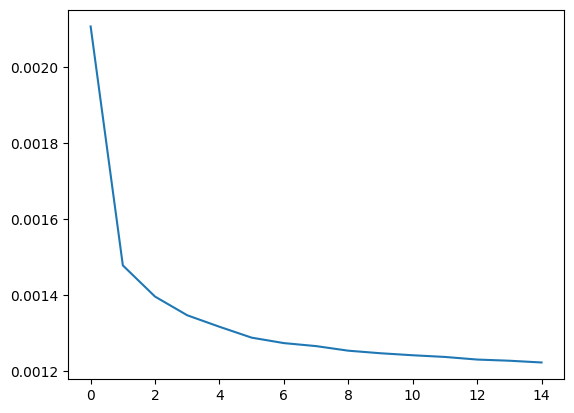

In [11]:
# Entrenando el modelo
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,  # Ajusta esto según la capacidad de tu hardware
    verbose=1  # Verbose para imprimir la información de entrenamiento
)

# Evaluar el modelo con datos de prueba si los tienes
loss = model.evaluate(X_test, y_test)

# Finalmente, puedes visualizar el proceso de entrenamiento con:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [14]:
# Evaluar el modelo con datos de prueba
loss = new_model.evaluate(X_test, y_test)
print(f"Loss: {loss}")

11421/11421 [==============================] - 166s 14ms/step - loss: 0.0014
Loss: 0.0014026741264387965


In [15]:
predicted_sales = new_model.predict(X_test)

11421/11421 [==============================] - 163s 14ms/step


In [16]:
from keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Realizar predicciones en el conjunto de test
predictions = new_model.predict(X_test)


# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # La raíz cuadrada del MSE es el RMSE

# Imprimir las métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


11421/11421 [==============================] - 161s 14ms/step
MAE: 0.028752010832377866
MSE: 0.00140267693535663
RMSE: 0.03745232883755869


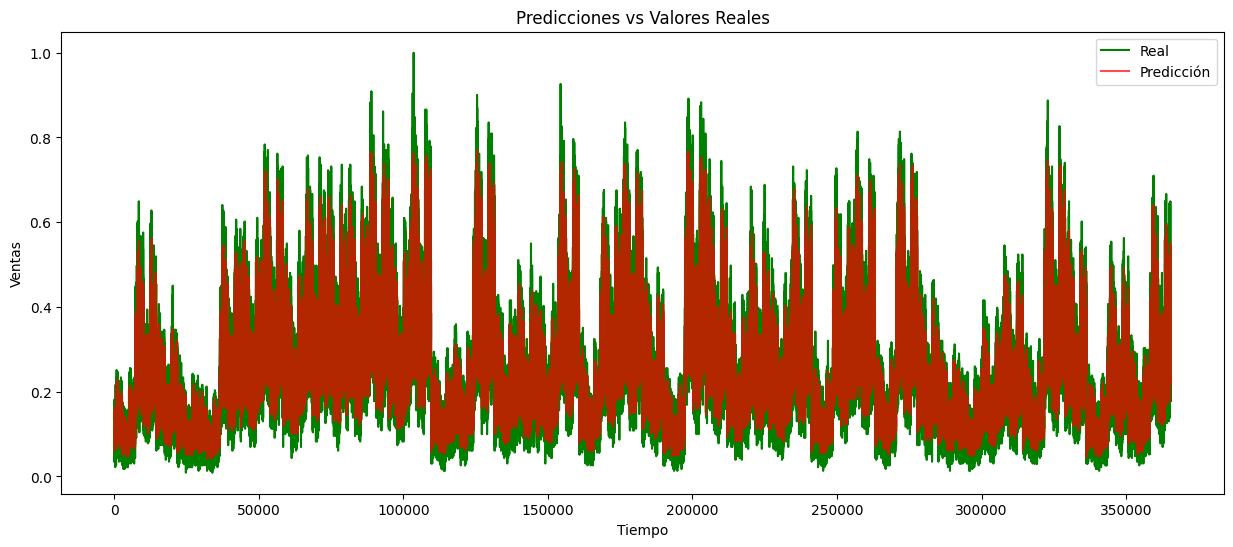

In [18]:
# Crear una figura y un set de subplots
plt.figure(figsize=(15,6))

# Dibujar los valores reales
plt.plot(y_test, color='green', label='Real')

# Dibujar las predicciones
plt.plot(predictions, color='red', alpha=0.7, label='Predicción')

# Títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Tiempo')
plt.ylabel('Ventas')
plt.legend()  # Muestra la leyenda

# Mostrar la gráfica
plt.show()

7. Ajuste de hiperparámetros


Cambios realizados:

*   BatchNormalization: Se aplicó normalización por lotes al inicio para facilitar el aprendizaje rápido y estable.
*   Unidades y capas: Se aumentaron las unidades en la primera capa  a 100 y se usaron un total de tres capas  para capturar relaciones temporales más complejas.
*   Dropout: Se implementó un 50% de dropout después de cada capa  para combatir el sobreajuste.
*   Optimizador: Se usó Adam con una tasa de aprendizaje de 0.001, que es un equilibrio entre la velocidad de entrenamiento y la capacidad de convergencia.
*   Entrenamiento: Se entrenó el modelo durante 40 épocas con un tamaño de lote de 64. Estos números afectan cómo de rápido y qué tan bien el modelo puede aprender.
*   Evaluación y Visualización: Se calculó MAE, MSE, y RMSE para evaluar el rendimiento, y luego se trazaron las predicciones en comparación con los valores reales para visualizar qué tan bien el modelo está prediciendo los datos.








Epoch 1/20
6843/6843 [==============================] - 1043s 152ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 2/20
6843/6843 [==============================] - 1035s 151ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 3/20
6843/6843 [==============================] - 1092s 160ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 4/20
6843/6843 [==============================] - 1039s 152ms/step - loss: 0.0018 - val_loss: 9.8741e-04
Epoch 5/20
6843/6843 [==============================] - 1038s 152ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 6/20
6843/6843 [==============================] - 1096s 160ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 7/20
6843/6843 [==============================] - 1038s 152ms/step - loss: 0.0018 - val_loss: 9.7022e-04
Epoch 8/20
6843/6843 [==============================] - 1040s 152ms/step - loss: 0.0017 - val_loss: 9.8858e-04
Epoch 9/20
6843/6843 [==============================] - 1095s 160ms/step - loss: 0.0019 - val_loss: 9.9120e-04
Epoch 10/20
6843/6843

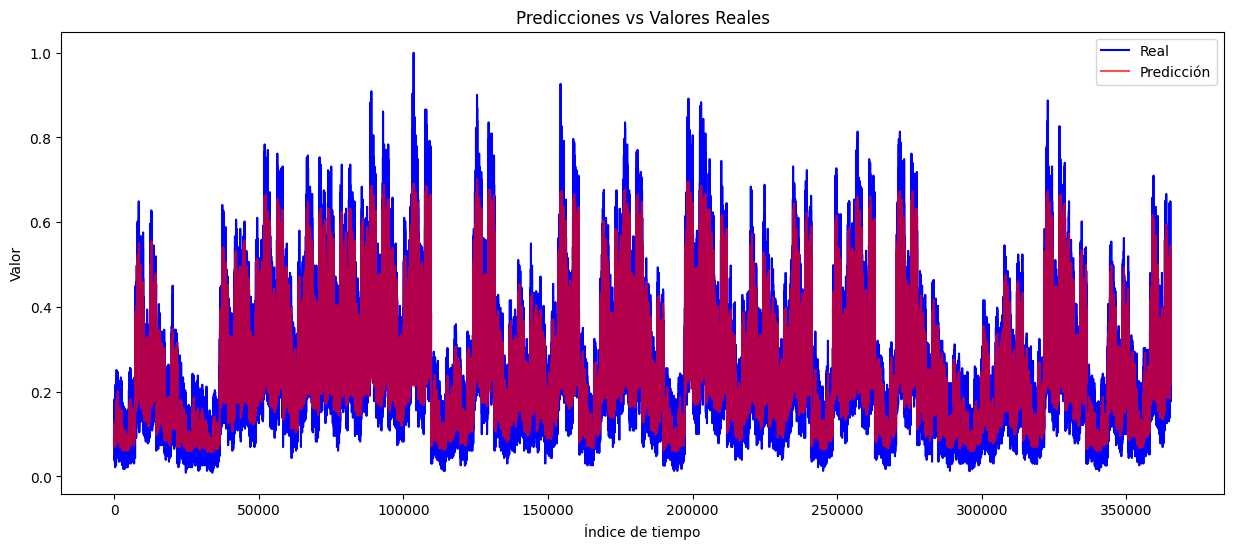

In [ ]:
from keras.models import Sequential
from keras.layers import , Dropout, Dense, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Construcción del modelo
model = Sequential()

# Normalización por lotes antes de las capas 
model.add(BatchNormalization(input_shape=(X_train.shape[1], 1)))

# Aumento en el número de unidades, adición de más capas  y aumento del dropout
model.add((units=100, return_sequences=True))  # Aumento a 100 unidades
model.add(Dropout(0.5))  # Aumento al 50%
model.add((units=50, return_sequences=True))
model.add(Dropout(0.5))  # Aumento al 50%
model.add((units=50))
model.add(Dropout(0.5))  # Aumento al 50%

# Capa de salida
model.add(Dense(units=1))

# Compilación del modelo con una tasa de aprendizaje modificada
adam_optimizer = Adam(lr=0.001)
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenamiento del modelo con más épocas y un tamaño de lote diferente
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Realizar predicciones
predictions = model.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  # RMSE

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Crear una figura y un set de subplots
plt.figure(figsize=(15,6))

# Dibujar los valores reales
plt.plot(y_test, color='blue', label='Real')

# Dibujar las predicciones
plt.plot(predictions, color='red', alpha=0.7, label='Predicción')

# Títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice de tiempo')
plt.ylabel('Valor')
plt.legend()

# Mostrar la gráfica
plt.show()


8. Forescasting

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Parámetros
window_size = 60
forecast_length = 90  # Para pronosticar 3 meses
results = pd.DataFrame()

# Función auxiliar para obtener predicciones multi-step
def multi_step_forecast(model, sequence, steps):
    forecasts = []
    seq_copy = sequence.copy()
    for i in range(steps):
        next_point = model.predict(seq_copy)
        forecasts.append(next_point[0][0])
        seq_copy = np.roll(seq_copy, shift=-1)
        seq_copy[0][-1][0] = next_point
    return forecasts

# Limitamos el bucle a 2 tiendas
for store in range(1, 3):
    store_data = data[data['store'] == store]

    for item in store_data['item'].unique():
        item_data = store_data[store_data['item'] == item]

        # Separa las ventas por fecha para el artículo y tienda actual
        sales_data = item_data.groupby(['date'])['sales'].sum().reset_index()

        # Separa datos de entrenamiento y prueba
        train_data = sales_data[:-forecast_length]
        test_data = sales_data[-forecast_length:]

   
        predictions = multi_step_forecast(model, test_data['sales'].values.reshape(1, window_size, 1), forecast_length)
        rmse = np.sqrt(mean_squared_error(test_data['sales'].values, predictions))
        print(f"Tienda {store}, Artículo {item} - RMSE: {rmse}")

        # Pronóstico para el artículo y tienda actual
        last_sequence = sales_data['sales'].values[-window_size:].reshape(1, window_size, 1)
        forecasts = multi_step_forecast(model, last_sequence, forecast_length)

        # Almacena los pronósticos
        forecast_dates = pd.date_range(start='2017-01-01', periods=forecast_length)
        for j, forecast_date in enumerate(forecast_dates):
            results = results.append({
                'store': store,
                'item': item,
                'date': forecast_date.strftime('%Y-%m-%d'),
                'forecasted_sales': forecasts[j]
            }, ignore_index=True)

print(results)


1/1 [==============================] - 0s 39ms/step


<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-i

1/1 [==============================] - 0s 26ms/step
     store        date  forecasted_sales
0        1  2017-01-01      1.288945e-02
1        1  2017-01-02     -5.692728e-03
2        1  2017-01-03     -1.015301e-02
3        1  2017-01-04     -6.668569e-03
4        1  2017-01-05     -3.236644e-04
..     ...         ...               ...
175      2  2017-03-27     -7.538073e-07
176      2  2017-03-28     -6.295229e-07
177      2  2017-03-29     -5.238956e-07
178      2  2017-03-30     -4.344884e-07
179      2  2017-03-31     -3.590473e-07

[180 rows x 3 columns]


<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-input-25-20957b63df68>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
<ipython-i

9. Visualización

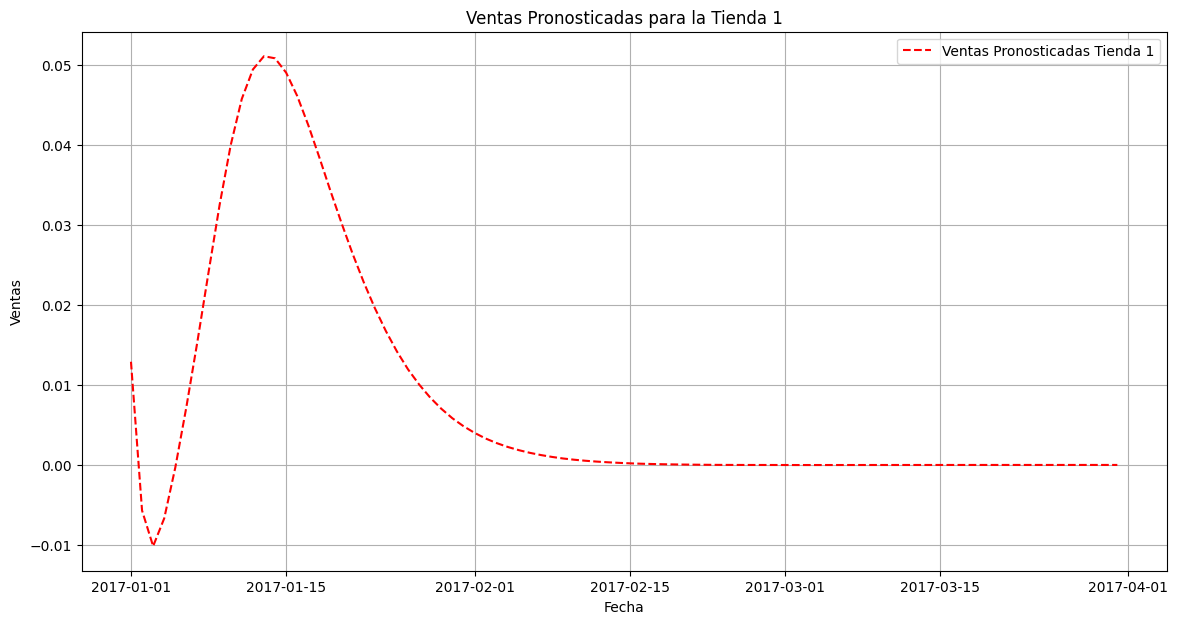

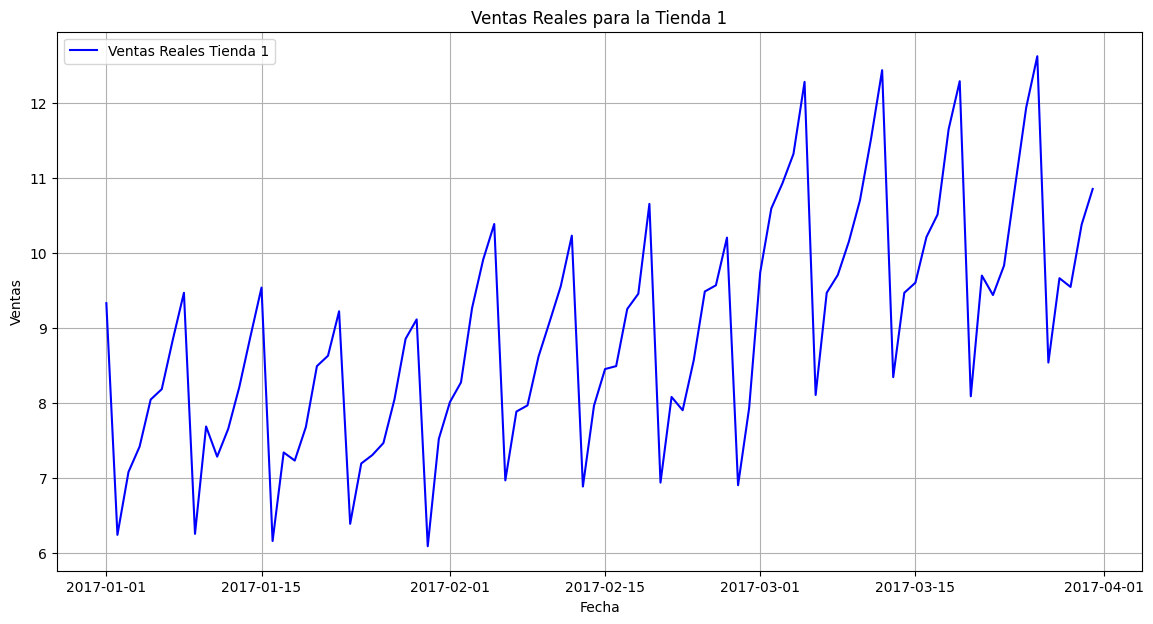


Métricas de error para la Tienda 1:
Mean Absolute Error (MAE): 8.95
Mean Squared Error (MSE): 82.47
Root Mean Squared Error (RMSE): 9.08


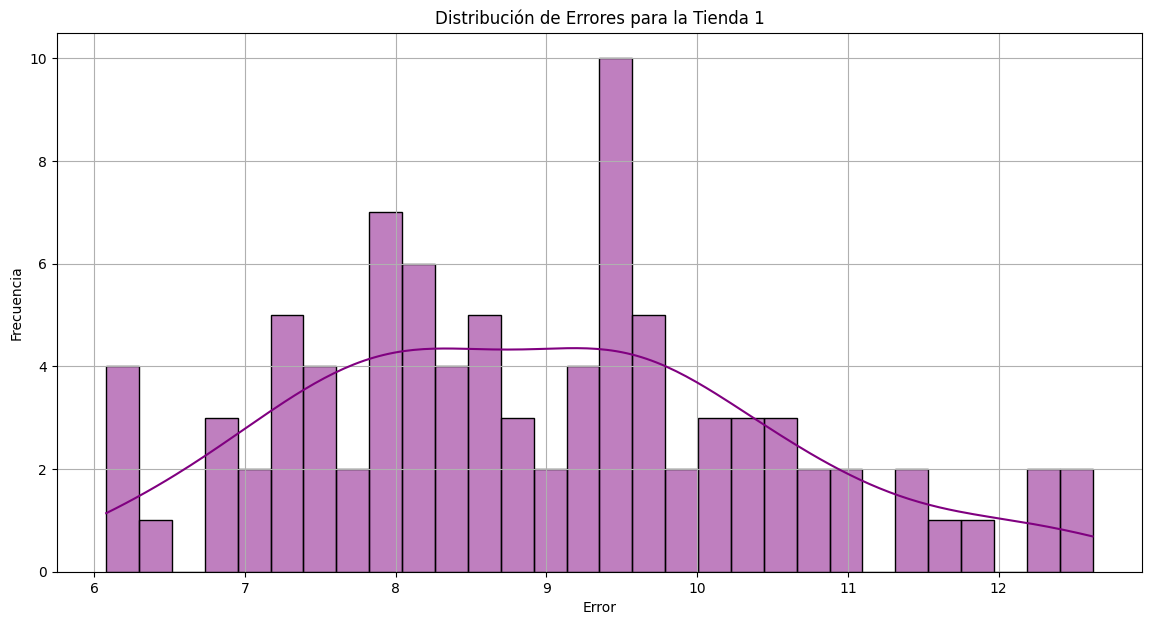

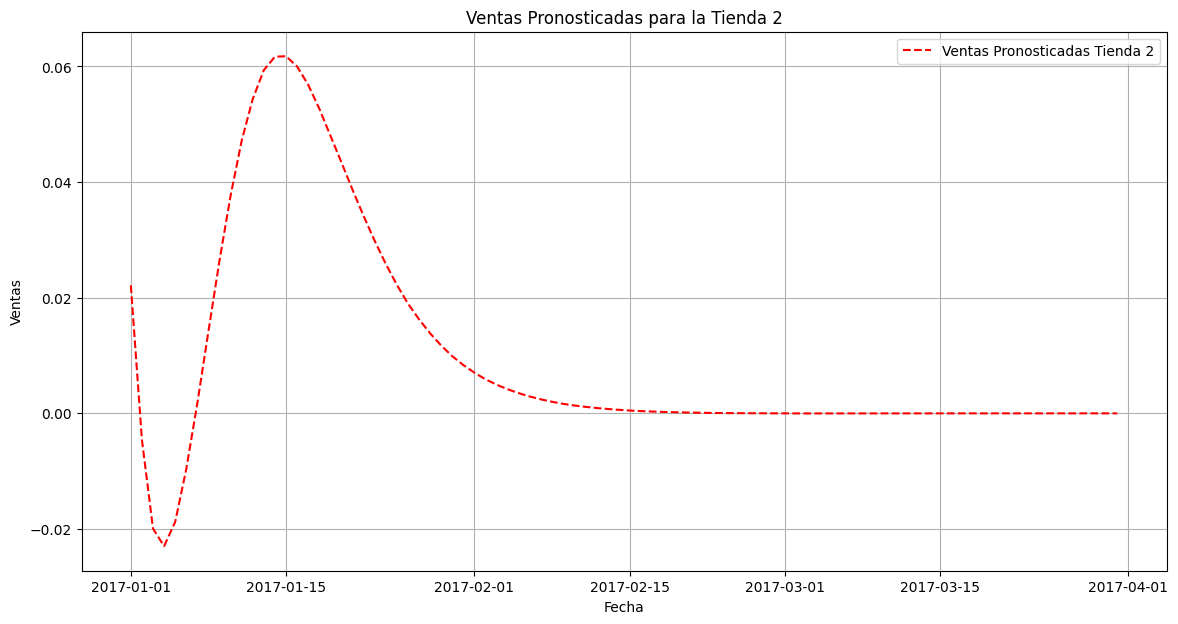

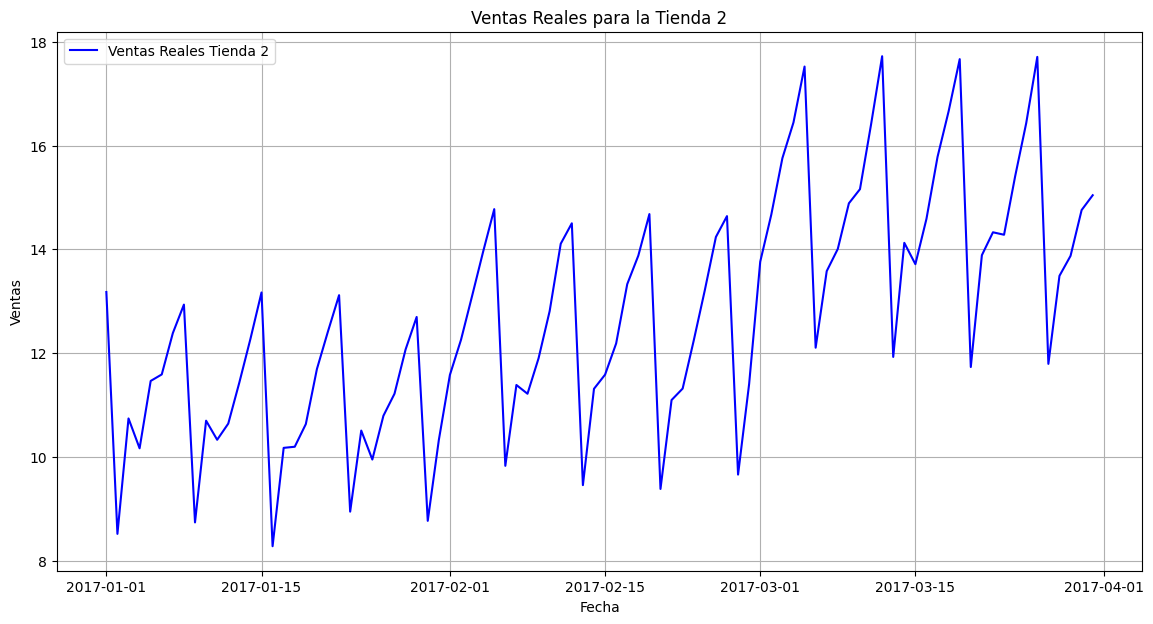


Métricas de error para la Tienda 2:
Mean Absolute Error (MAE): 12.70
Mean Squared Error (MSE): 166.56
Root Mean Squared Error (RMSE): 12.91


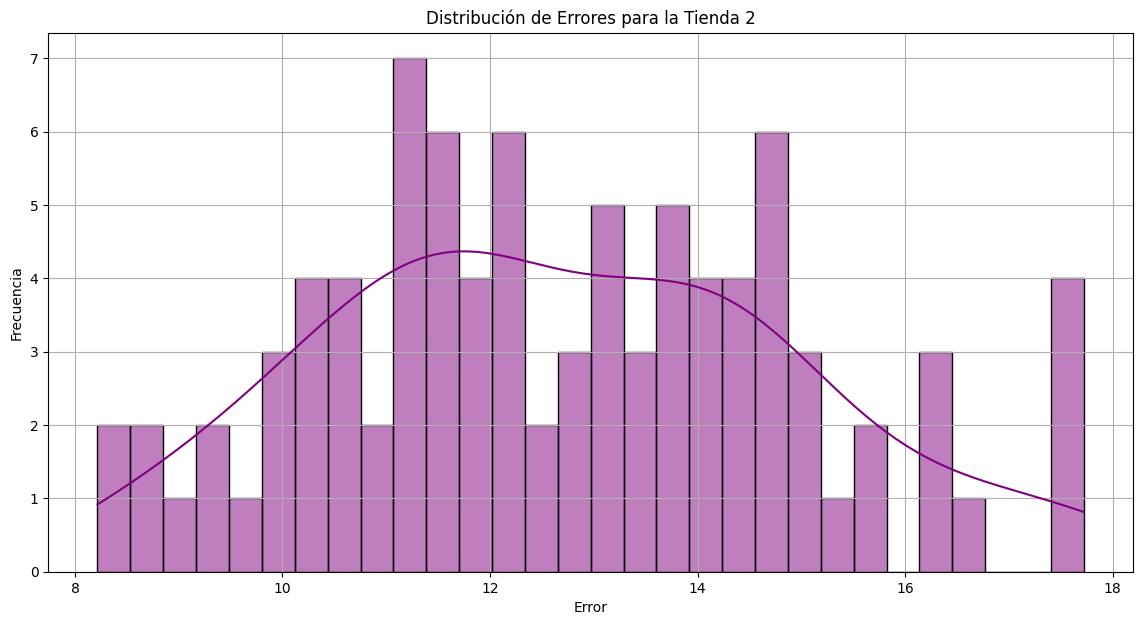

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Función para imprimir métricas y gráficos por tienda
def print_store_analysis(store_data, store):
    # Asegúrate de que 'date' sea realmente una fecha
    store_data['date'] = pd.to_datetime(store_data['date'])

    # Gráfico de ventas pronosticadas
    plt.figure(figsize=(14, 7))
    plt.plot(store_data['date'], store_data['forecasted_sales'], color='red', linestyle='--', label=f'Ventas Pronosticadas Tienda {store}')
    plt.title(f'Ventas Pronosticadas para la Tienda {store}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Si hay ventas reales disponibles en store_data, gráficarlas
    if 'sales' in store_data:
        # Gráfico de ventas reales
        plt.figure(figsize=(14, 7))
        plt.plot(store_data['date'], store_data['sales'], color='blue', label=f'Ventas Reales Tienda {store}')
        plt.title(f'Ventas Reales para la Tienda {store}')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Calcular errores si hay datos reales
        errors = store_data['sales'] - store_data['forecasted_sales']
        mae = mean_absolute_error(store_data['sales'], store_data['forecasted_sales'])
        mse = mean_squared_error(store_data['sales'], store_data['forecasted_sales'])
        rmse = np.sqrt(mse)

        # Imprimir métricas de error
        print(f"\nMétricas de error para la Tienda {store}:")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

        # Gráfico de distribución de errores
        plt.figure(figsize=(14, 7))
        sns.histplot(errors, bins=30, kde=True, color='purple')
        plt.title(f'Distribución de Errores para la Tienda {store}')
        plt.xlabel('Error')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:
        print(f"\nNo hay datos de ventas reales disponibles para la Tienda {store} para el período pronosticado.")

# Asumiendo que 'merged' es tu DataFrame que contiene tanto las predicciones como las ventas reales
for store in merged['store'].unique():
    store_data = merged[merged['store'] == store].sort_values('date')
    print_store_analysis(store_data, store)


Segunda operacion

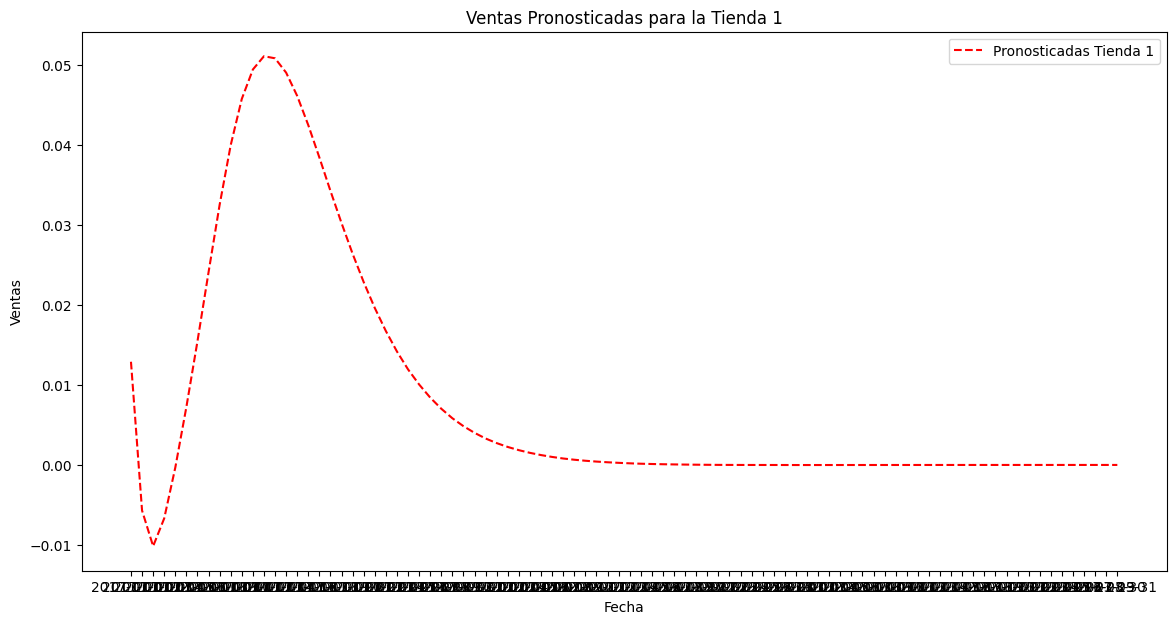

Estadísticas de ventas pronosticadas para la Tienda 1:
count    90.000000
mean      0.007953
std       0.015113
min      -0.010153
25%      -0.000003
50%       0.000076
75%       0.008120
max       0.051051
Name: forecasted_sales, dtype: float64


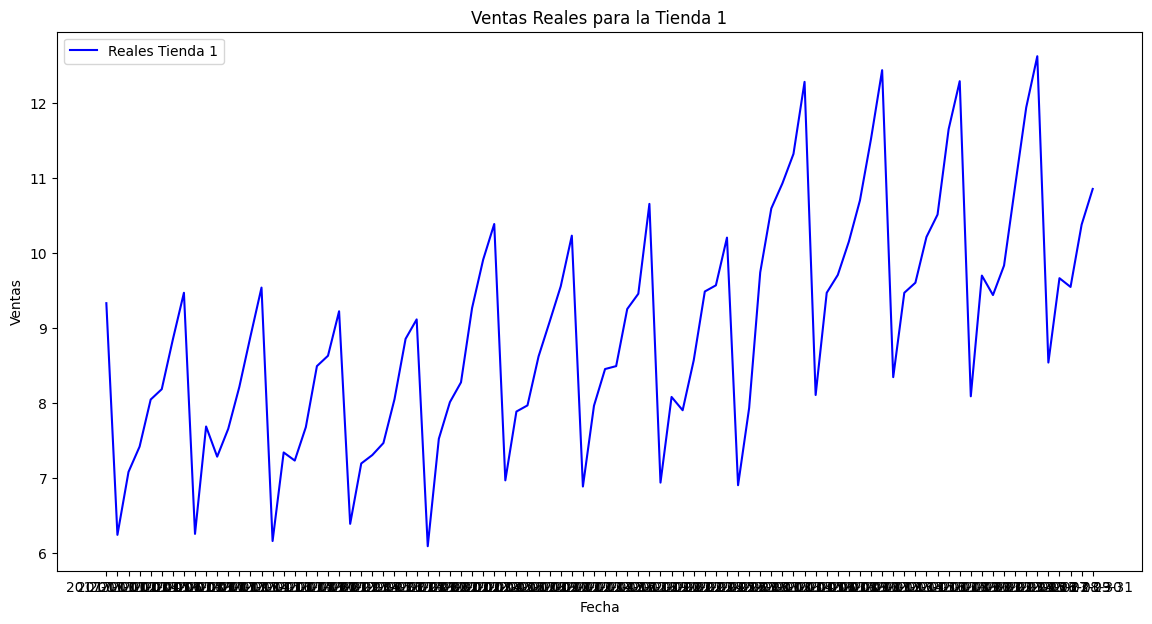

Estadísticas de ventas reales para la Tienda 1:
count    90.000000
mean      8.957239
std       1.547038
min       6.086580
25%       7.908009
50%       8.867965
75%       9.808442
max      12.623377
Name: sales, dtype: float64
Tienda 1 - MAE: 8.949285648733154, MSE: 82.47275070493782, RMSE: 9.08145091408514


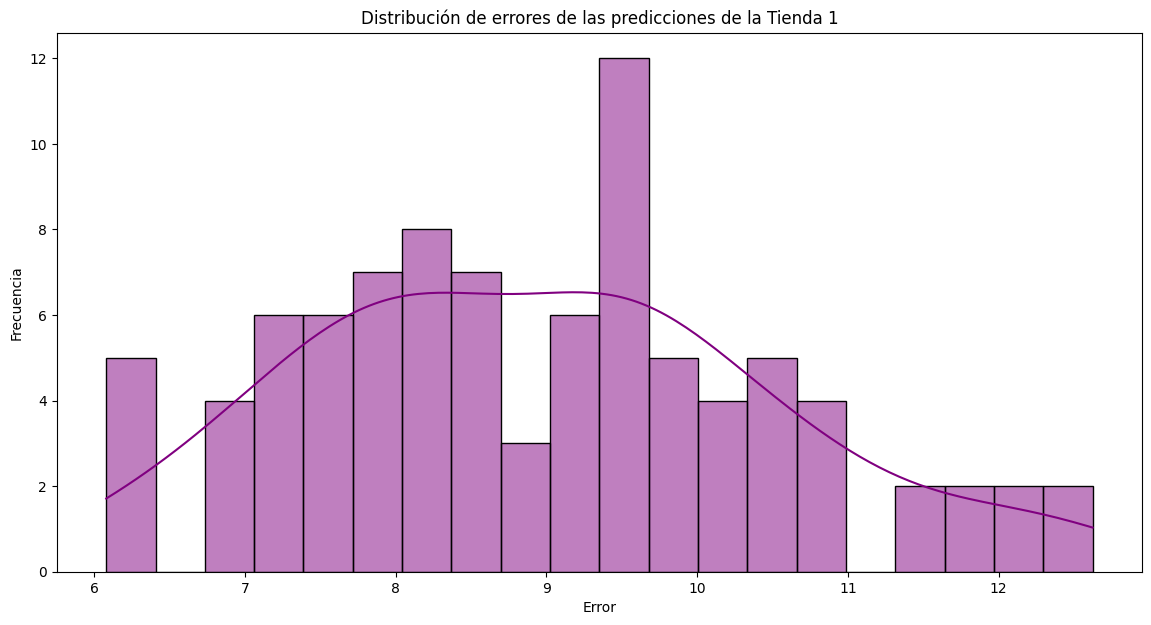

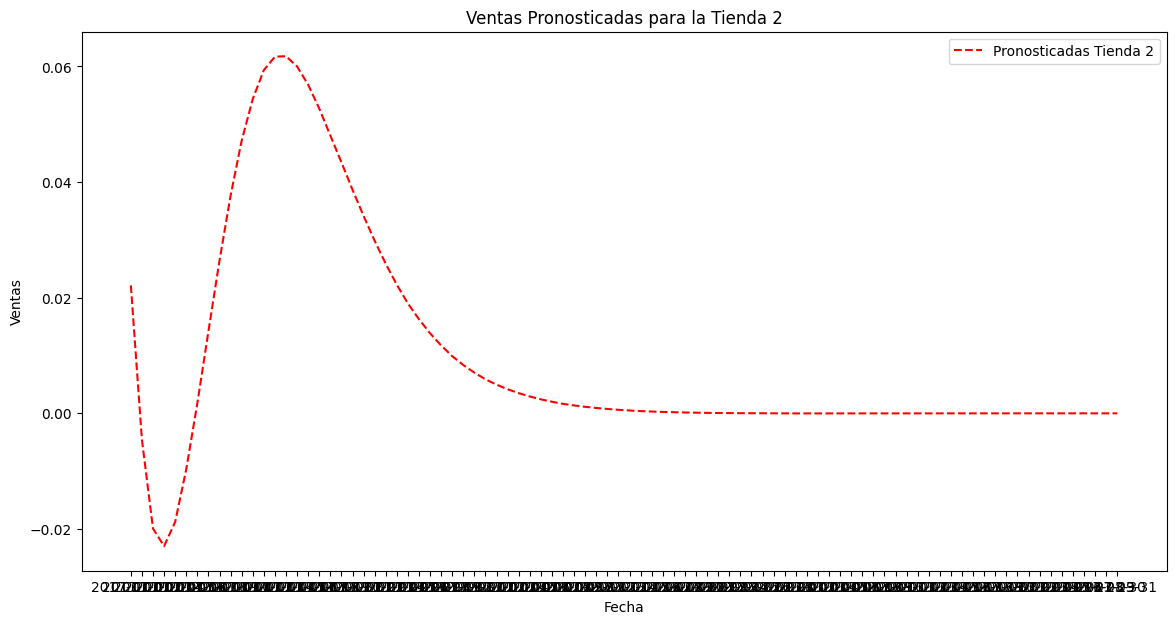

Estadísticas de ventas pronosticadas para la Tienda 2:
count    90.000000
mean      0.009364
std       0.019095
min      -0.022988
25%      -0.000003
50%       0.000172
75%       0.011270
max       0.061777
Name: forecasted_sales, dtype: float64


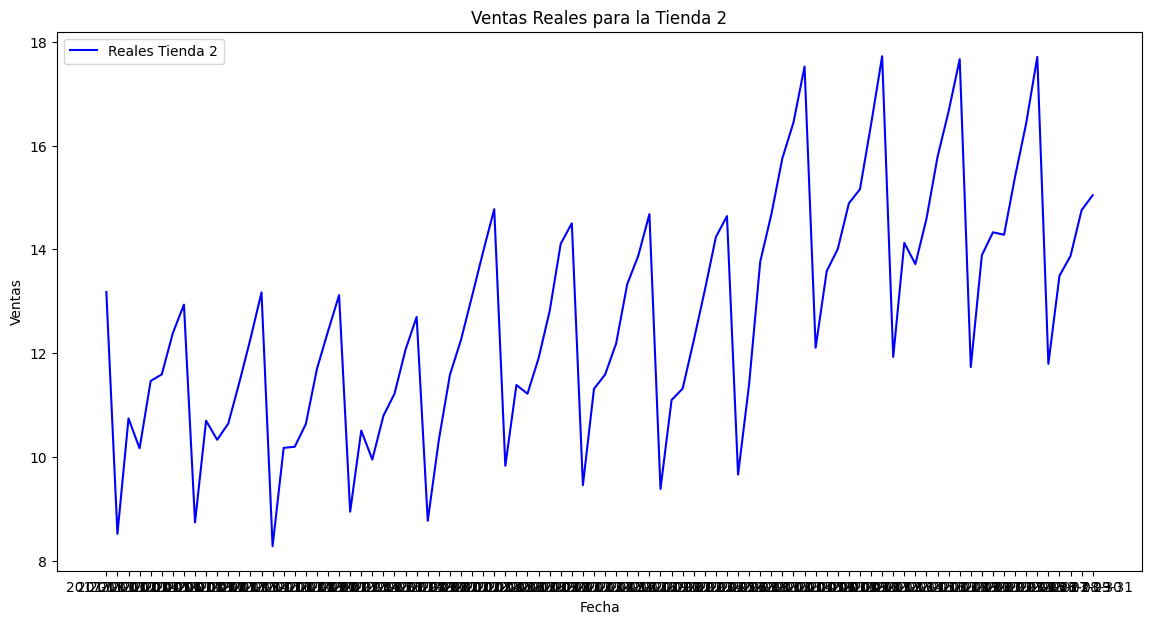

Estadísticas de ventas reales para la Tienda 2:
count    90.000000
mean     12.714238
std       2.274001
min       8.277056
25%      11.216450
50%      12.402597
75%      14.270563
max      17.722944
Name: sales, dtype: float64
Tienda 2 - MAE: 12.704873170400202, MSE: 166.55837405086024, RMSE: 12.905749650867254


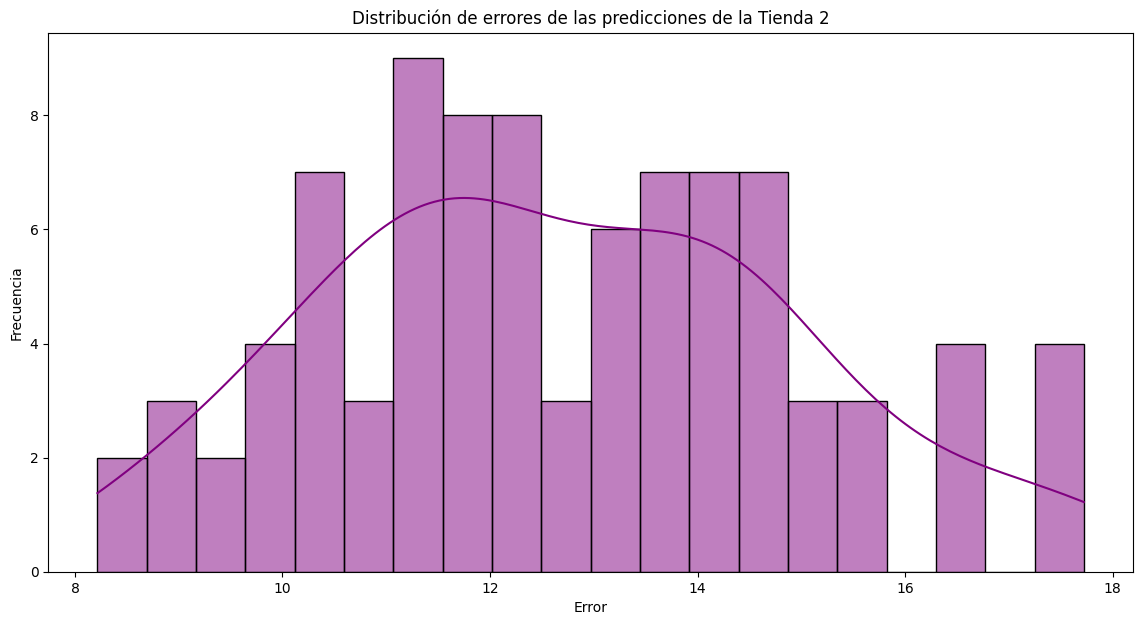

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ... [parte inicial del código se mantiene igual]

def analyze_store(store_data, store):
    # Gráfico de ventas pronosticadas
    plt.figure(figsize=(14, 7))
    plt.plot(store_data['date'], store_data['forecasted_sales'], 'r--', label=f'Pronosticadas Tienda {store}')
    plt.title(f'Ventas Pronosticadas para la Tienda {store}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.show()

    # Imprimir estadísticas resumidas de las ventas pronosticadas
    print(f"Estadísticas de ventas pronosticadas para la Tienda {store}:")
    print(store_data['forecasted_sales'].describe())

    if 'sales' in store_data:
        # Gráfico de ventas reales
        plt.figure(figsize=(14, 7))
        plt.plot(store_data['date'], store_data['sales'], 'b', label=f'Reales Tienda {store}')
        plt.title(f'Ventas Reales para la Tienda {store}')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.legend()
        plt.show()

        # Imprimir estadísticas resumidas de las ventas reales
        print(f"Estadísticas de ventas reales para la Tienda {store}:")
        print(store_data['sales'].describe())

        # Calcular y mostrar métricas de error
        mae = mean_absolute_error(store_data['sales'], store_data['forecasted_sales'])
        mse = mean_squared_error(store_data['sales'], store_data['forecasted_sales'])
        rmse = np.sqrt(mse)
        print(f'Tienda {store} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

        # Gráfico de errores
        errors = store_data['sales'] - store_data['forecasted_sales']
        plt.figure(figsize=(14, 7))
        sns.histplot(errors, bins=20, color='purple', kde=True)
        plt.title(f'Distribución de errores de las predicciones de la Tienda {store}')
        plt.xlabel('Error')
        plt.ylabel('Frecuencia')
        plt.show()

# Análisis por tienda
for store in merged['store'].unique():
    store_data = merged[merged['store'] == store]
    analyze_store(store_data, store)


Tercera


Estadísticas de ventas pronosticadas para la Tienda 1:
count    90.000000
mean      0.007953
std       0.015113
min      -0.010153
25%      -0.000003
50%       0.000076
75%       0.008120
max       0.051051
Name: forecasted_sales, dtype: float64


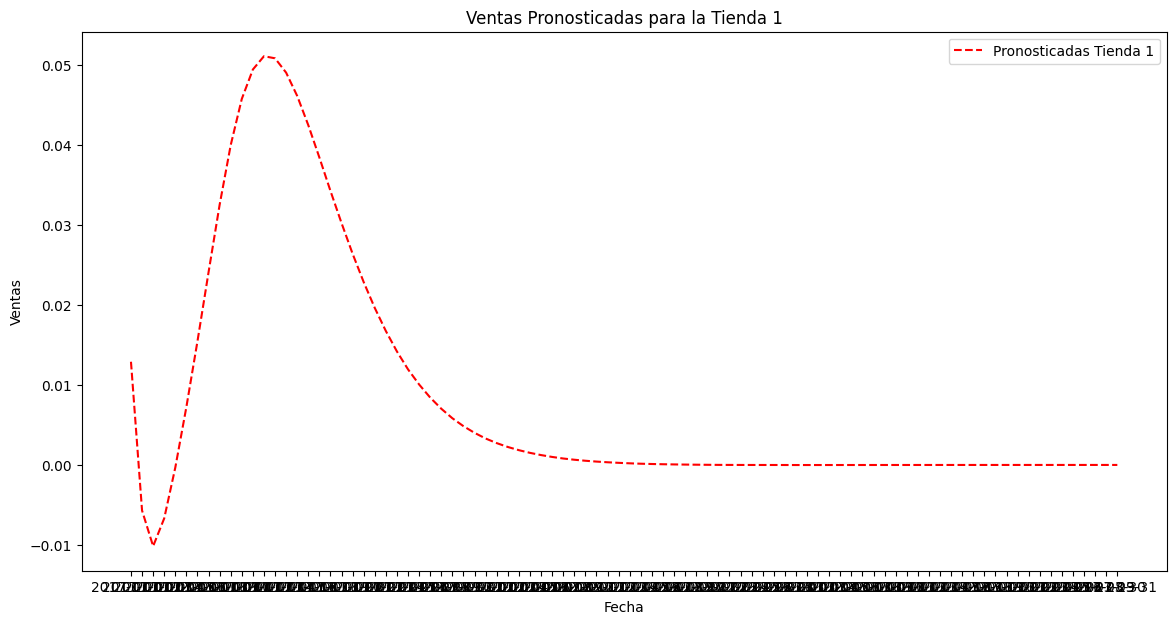


Estadísticas de ventas reales para la Tienda 1:
count    90.000000
mean      8.957239
std       1.547038
min       6.086580
25%       7.908009
50%       8.867965
75%       9.808442
max      12.623377
Name: sales, dtype: float64


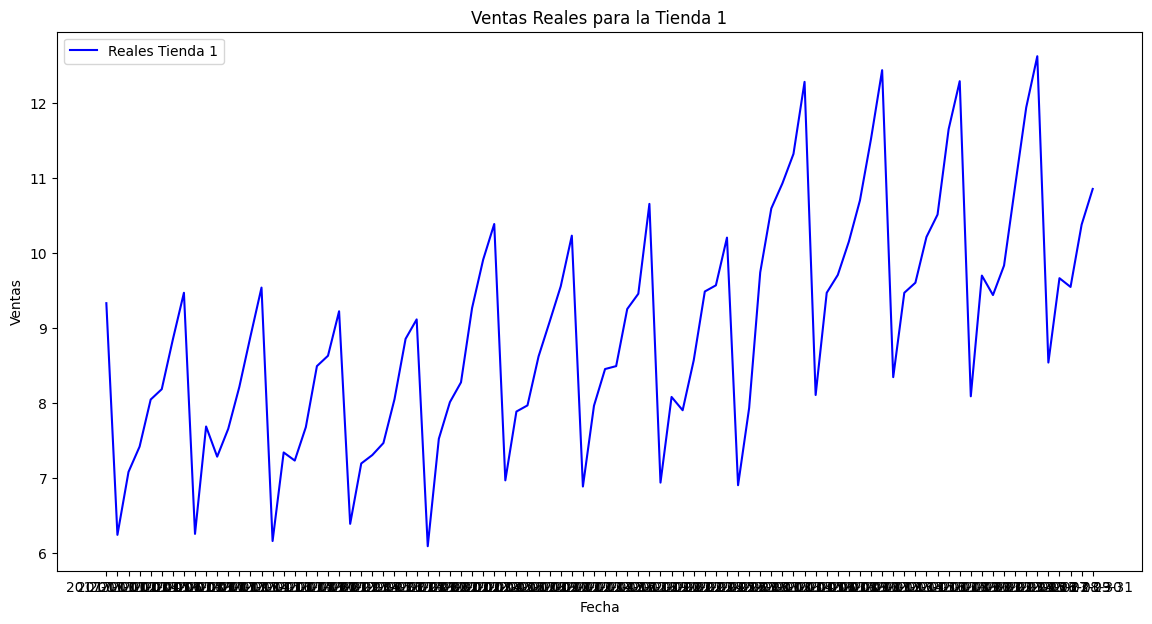


Tienda 1 - MAE: 8.949285648733154, MSE: 82.47275070493782, RMSE: 9.08145091408514


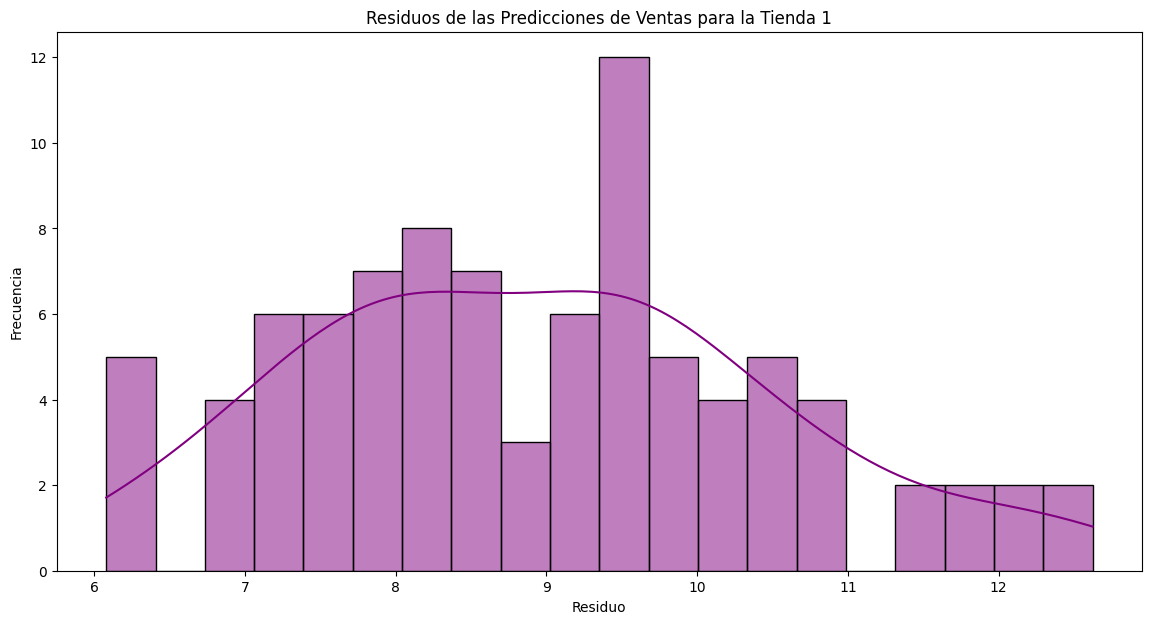

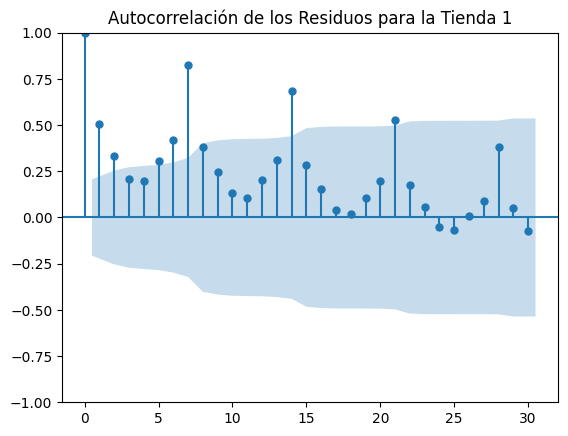

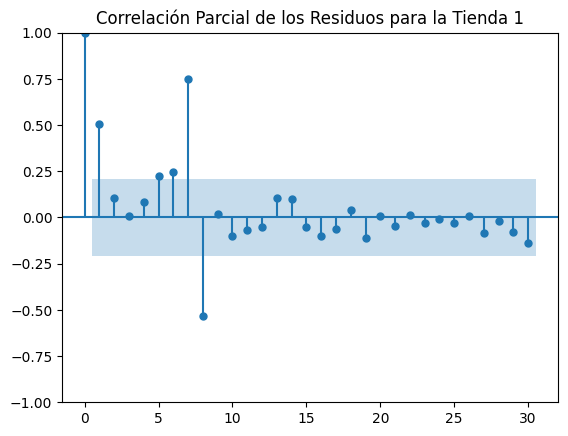


Estadísticas de ventas pronosticadas para la Tienda 2:
count    90.000000
mean      0.009364
std       0.019095
min      -0.022988
25%      -0.000003
50%       0.000172
75%       0.011270
max       0.061777
Name: forecasted_sales, dtype: float64


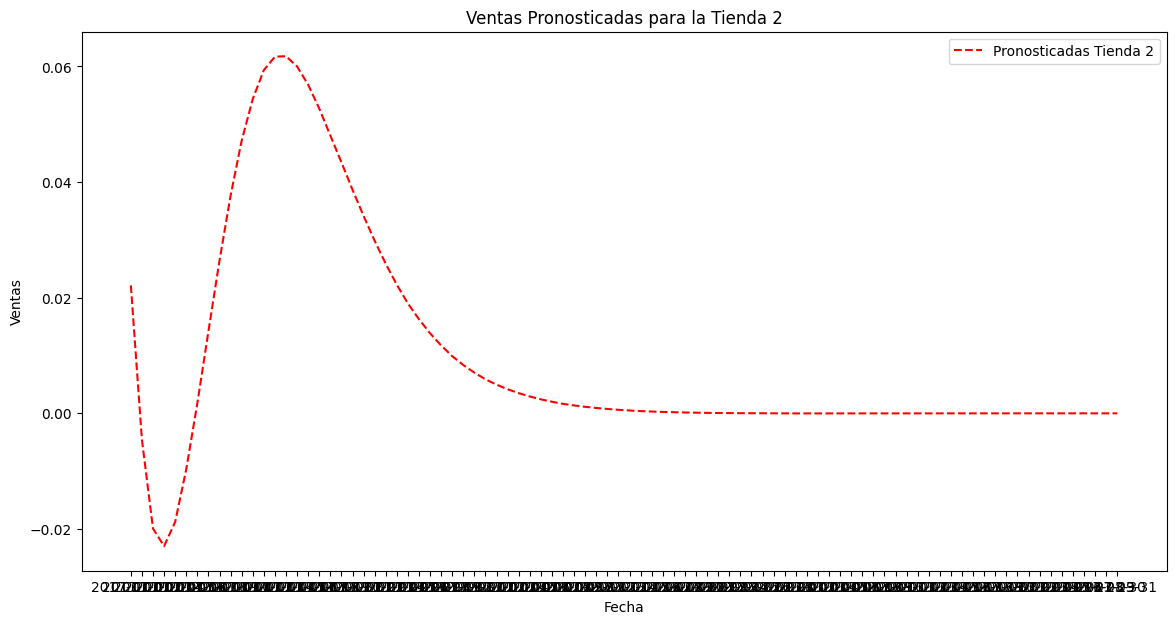


Estadísticas de ventas reales para la Tienda 2:
count    90.000000
mean     12.714238
std       2.274001
min       8.277056
25%      11.216450
50%      12.402597
75%      14.270563
max      17.722944
Name: sales, dtype: float64


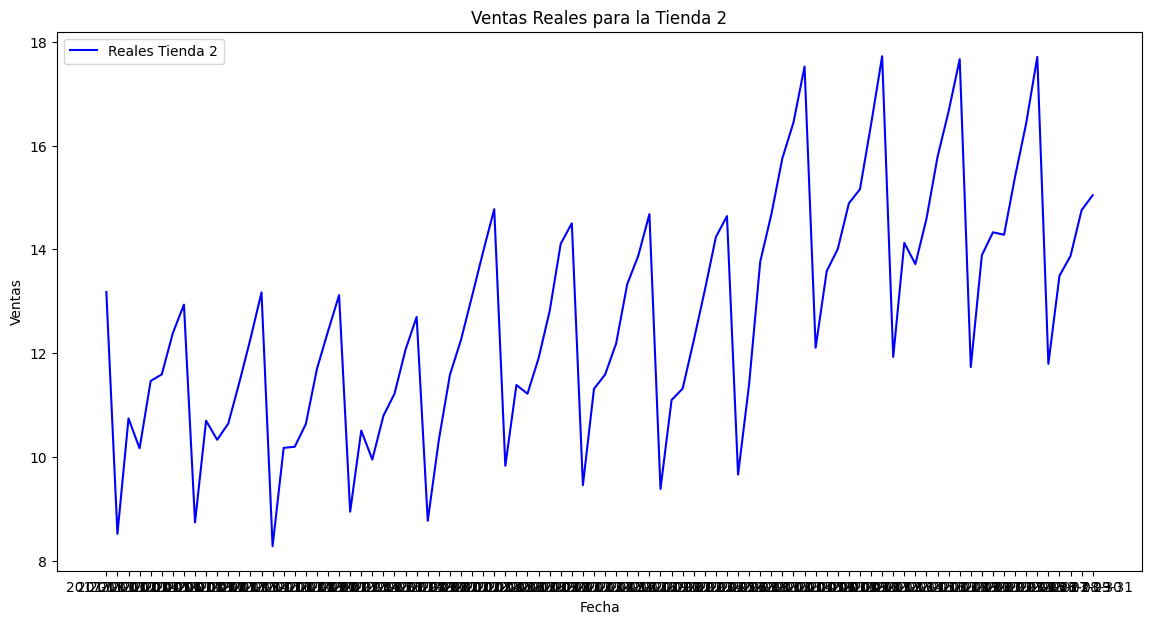


Tienda 2 - MAE: 12.704873170400202, MSE: 166.55837405086024, RMSE: 12.905749650867254


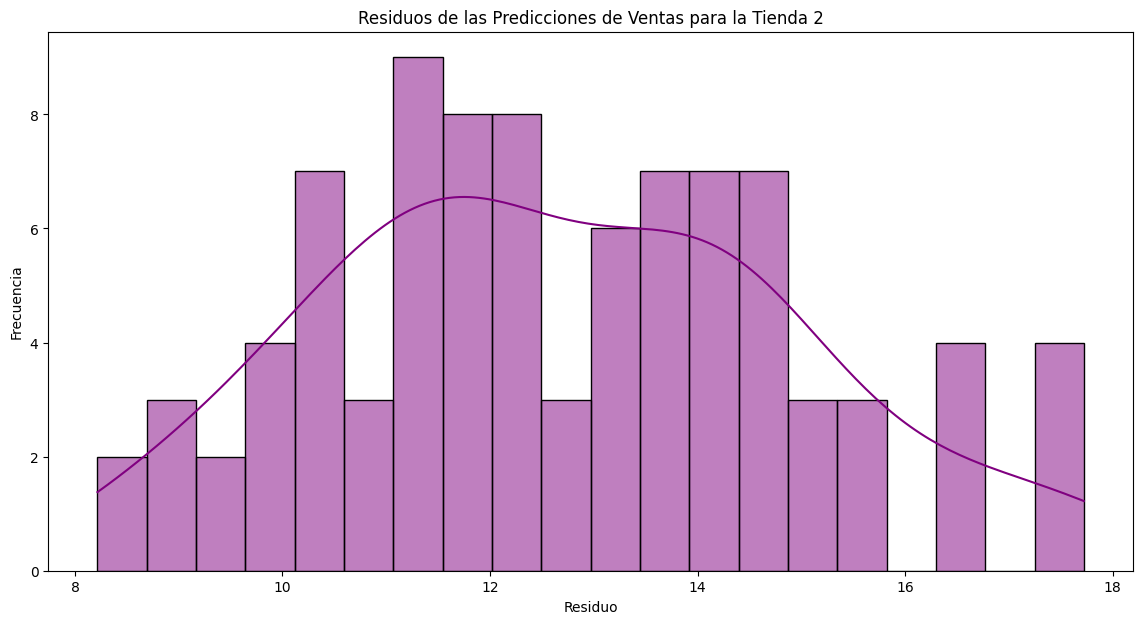

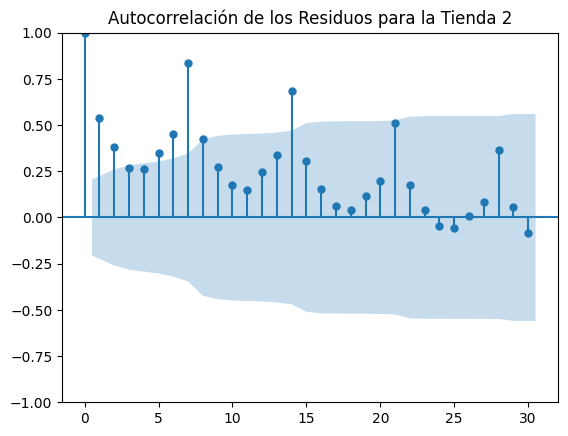

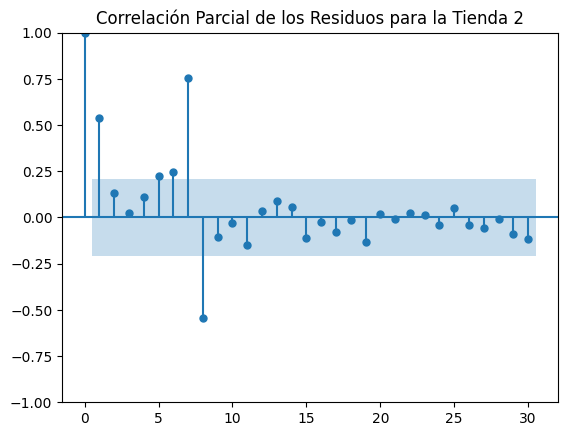

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ... [parte inicial del código se mantiene igual]

def analyze_store(store_data, store):
    # Estadísticas descriptivas de las ventas pronosticadas
    print(f"\nEstadísticas de ventas pronosticadas para la Tienda {store}:")
    print(store_data['forecasted_sales'].describe())

    # Gráfico de ventas pronosticadas
    plt.figure(figsize=(14, 7))
    plt.plot(store_data['date'], store_data['forecasted_sales'], 'r--', label=f'Pronosticadas Tienda {store}')
    plt.title(f'Ventas Pronosticadas para la Tienda {store}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.show()

    # Si hay ventas reales disponibles, hacemos análisis adicionales
    if 'sales' in store_data:
        # Estadísticas descriptivas de las ventas reales
        print(f"\nEstadísticas de ventas reales para la Tienda {store}:")
        print(store_data['sales'].describe())

        # Gráfico de ventas reales
        plt.figure(figsize=(14, 7))
        plt.plot(store_data['date'], store_data['sales'], 'b-', label=f'Reales Tienda {store}')
        plt.title(f'Ventas Reales para la Tienda {store}')
        plt.xlabel('Fecha')
        plt.ylabel('Ventas')
        plt.legend()
        plt.show()

        # Calcular y mostrar métricas de error
        mae = mean_absolute_error(store_data['sales'], store_data['forecasted_sales'])
        mse = mean_squared_error(store_data['sales'], store_data['forecasted_sales'])
        rmse = np.sqrt(mse)
        print(f'\nTienda {store} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

        # Gráfico de residuos (errores) de las predicciones
        residuals = store_data['sales'] - store_data['forecasted_sales']
        plt.figure(figsize=(14, 7))
        sns.histplot(residuals, bins=20, color='purple', kde=True)
        plt.title(f'Residuos de las Predicciones de Ventas para la Tienda {store}')
        plt.xlabel('Residuo')
        plt.ylabel('Frecuencia')
        plt.show()

        # Gráfico de autocorrelación de los residuos para verificar la aleatoriedad
        plot_acf(residuals, lags=30, title=f'Autocorrelación de los Residuos para la Tienda {store}')
        plt.show()

        # Gráfico de correlación parcial de los residuos
        plot_pacf(residuals, lags=30, title=f'Correlación Parcial de los Residuos para la Tienda {store}')
        plt.show()

# Análisis por tienda
for store in merged['store'].unique():
    store_data = merged[merged['store'] == store]
    analyze_store(store_data, store)


Diferencia en ventas entre 2016 y 2017: 709.4935064935089


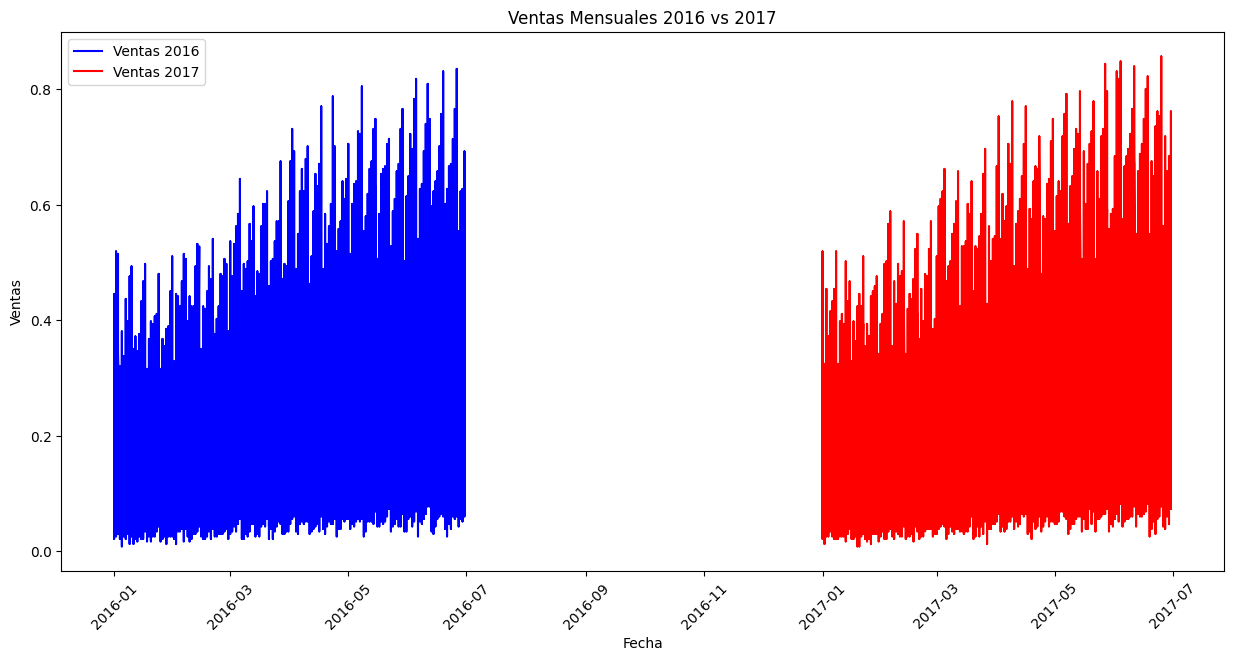

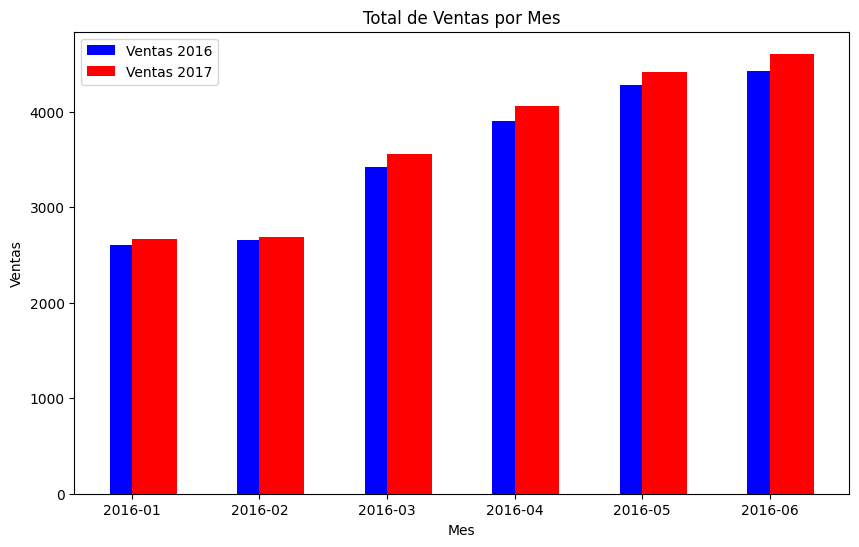

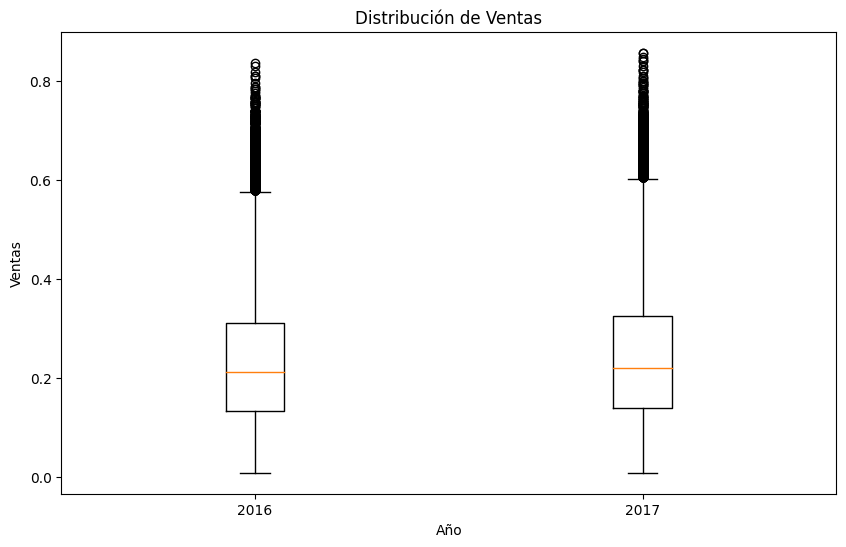

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que 'data' es tu DataFrame y ya contiene datos de ventas con fechas.
data['date'] = pd.to_datetime(data['date'])

# Filtrar los datos para los primeros 6 meses de 2016 y 2017.
data_2016 = data[(data['date'] >= '2016-01-01') & (data['date'] < '2016-07-01')]
data_2017 = data[(data['date'] >= '2017-01-01') & (data['date'] < '2017-07-01')]

# Calcular la suma total de ventas
total_sales_2016 = data_2016['sales'].sum()
total_sales_2017 = data_2017['sales'].sum()

# Calcular la diferencia
difference = total_sales_2017 - total_sales_2016
print(f'Diferencia en ventas entre 2016 y 2017: {difference}')

# Gráfico de líneas
plt.figure(figsize=(15,7))
plt.plot(data_2016['date'], data_2016['sales'], label='Ventas 2016', color='blue')
plt.plot(data_2017['date'], data_2017['sales'], label='Ventas 2017', color='red')
plt.title('Ventas Mensuales 2016 vs 2017')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras
plt.figure(figsize=(10,6))
width = 0.35  # the width of the bars
months = monthly_sales_2016.index.astype(str)
x = range(len(months))
plt.bar(x, monthly_sales_2016['sales'], width, label='Ventas 2016', color='blue', align='center')
plt.bar(x, monthly_sales_2017['sales'], width, label='Ventas 2017', color='red', align='edge')
plt.title('Total de Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(ticks=x, labels=months)
plt.legend()
plt.show()

# Gráfico de cajas
plt.figure(figsize=(10,6))
plt.boxplot([data_2016['sales'], data_2017['sales']], labels=['2016', '2017'])
plt.title('Distribución de Ventas')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.show()


Ventas totales en los primeros 6 meses de 2016: 21305.71861471861
Ventas totales en los primeros 6 meses de 2017: 22015.21212121212
Diferencia en ventas entre 2016 y 2017: 709.4935064935089


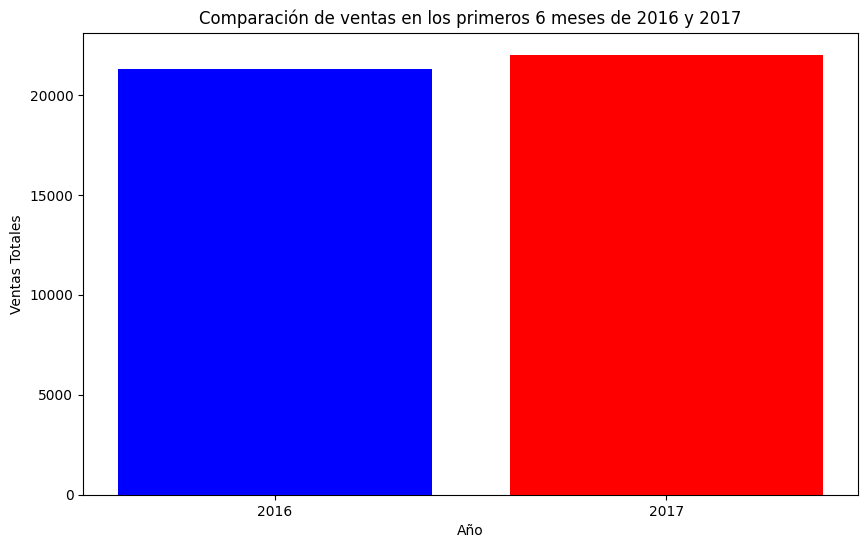

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumiendo que 'data' es tu DataFrame y ya contiene datos de ventas con fechas.
data['date'] = pd.to_datetime(data['date'])

# Filtrar los datos para los primeros 6 meses de 2016 y 2017.
data_2016 = data[(data['date'] >= '2016-01-01') & (data['date'] < '2016-07-01')]
data_2017 = data[(data['date'] >= '2017-01-01') & (data['date'] < '2017-07-01')]

# Calcular la suma total de ventas
total_sales_2016 = data_2016['sales'].sum()
total_sales_2017 = data_2017['sales'].sum()

# Calcular la diferencia
difference = total_sales_2017 - total_sales_2016
print(f'Ventas totales en los primeros 6 meses de 2016: {total_sales_2016}')
print(f'Ventas totales en los primeros 6 meses de 2017: {total_sales_2017}')
print(f'Diferencia en ventas entre 2016 y 2017: {difference}')

# Gráfico comparativo
plt.figure(figsize=(10,6))
years = ['2016', '2017']
sales = [total_sales_2016, total_sales_2017]

plt.bar(years, sales, color=['blue', 'red'])
plt.title('Comparación de ventas en los primeros 6 meses de 2016 y 2017')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.show()


10. Interpretabilidad

El modelo trabajado funciona para predecir las ventas en un periodo de 3 meses. Los últimos gráficos generados en el punto 9 son una herramienta para visualizar si el modelo funcionó según lo esperado. En estos gráficos se reflejan las ventas reales para los años 2016 y 2017 los cuales fueron los evaluados durante el laboratorio.

Para los primeros 3 meses de 2017 se ve que enero y febrero tienen el comportamiento esperado ya que las ventas aumentan de mes a mes, sin embargo, para mediados de marzo y el resto del semestre las ventas caen. En los gráficos del punto 9 se ve que estos no eran los resultados esperados ya que las ventas aumentaron pero no lo hicieron tanto, siguieron un crecimiento controlado. Sin embargo, para mediados de febrero es posible observar que existe una pequeña caida en las ventas, es posible que el modelo interpretara esta caida como un comportamiento que continuaría por lo que la tendencia quedó marcada y se arregló pero no lo suficiente como para corregir la tendencia esperada.

Se realizaron 3 iteraciones para este modelo y no existieron mayores diferencias entre ellas. Ambas tiendas reflejaron un comporamiento similar durante los 3 primeros meses de 2017, tomando como referencia lo ocurrido en el mismo periodo de 2016.

In [19]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.5 MB/s eta 0:00:00


In [20]:
print(X_train.shape)

(437968, 40, 1)


In [21]:
# Aplanar la dimensión de los pasos temporales
X_train_flat = X_train.reshape((X_train.shape[0], -1))  # Esto convertirá la forma a (437952, 60)

print(X_train_flat.shape)


(437968, 40)


[01:01:40] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[01:01:41] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


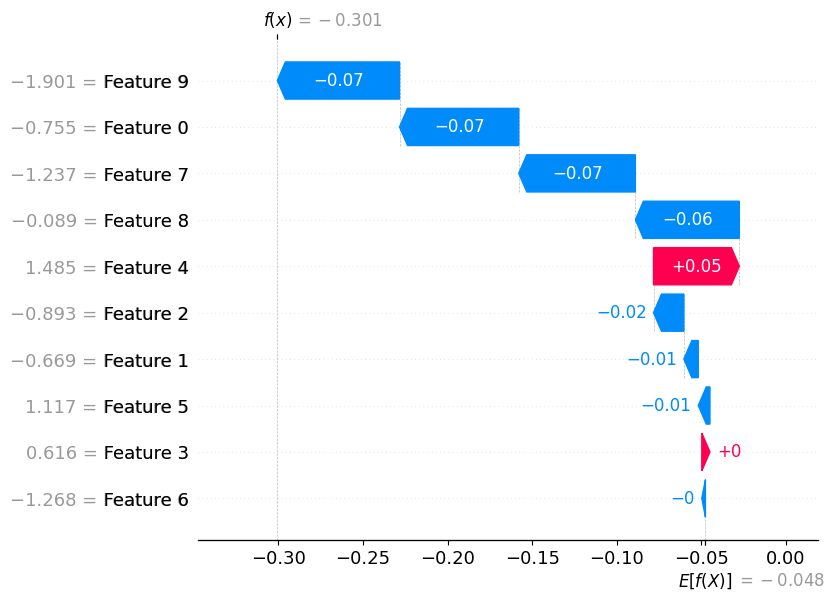

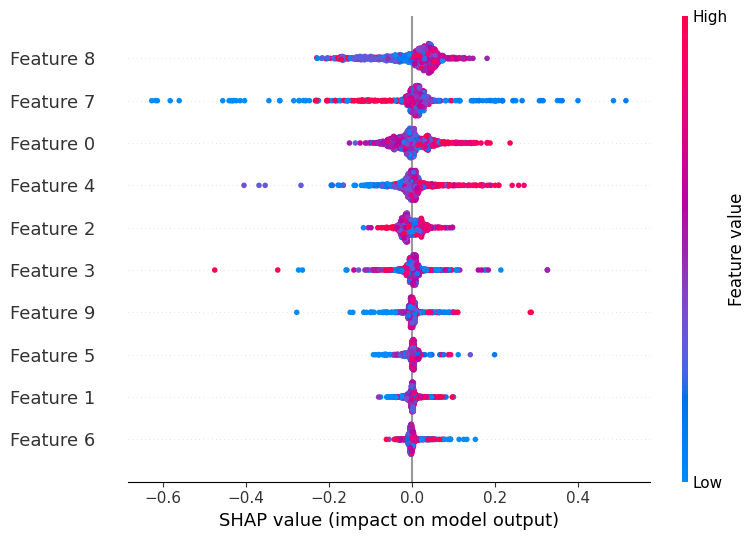

In [24]:
import shap
import xgboost
import numpy as np

# Crear datos ficticios para el propósito de demostración
num_samples = 1000
sequence_length = 10
num_features = 1

X_train_np = np.random.randn(num_samples, sequence_length, num_features)
y_train = np.random.randn(num_samples)

# Aplanar la última dimensión si es 1
if X_train_np.shape[-1] == 1:
    X_train_2d = X_train_np.reshape((X_train_np.shape[0], X_train_np.shape[1]))
else:
    # En caso de que la última dimensión no sea 1, debes decidir cómo manejar este caso.
    X_train_2d = X_train_np.reshape((X_train_np.shape[0], -1))  # Esto combina las últimas dos dimensiones

# Continuar con el entrenamiento del modelo como antes, pero usando X_train_2d
dtrain = xgboost.DMatrix(X_train_2d, label=y_train)

# Entrenar el modelo; los parámetros pueden necesitar ser ajustados dependiendo de tu problema específico
params = {"learning_rate": 0.01, "objective": "reg:squarederror"}
num_round = 100
model = xgboost.train(params, dtrain, num_round)

# Explicar las predicciones del modelo utilizando SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_train_2d)

# Verificar si shap_values es una lista, lo que sucede en la clasificación multiclase.
if isinstance(shap_values, list):
    class_index = 0
    shap_values_class = shap_values[class_index]
else:
    shap_values_class = shap_values

# Visualizar la primera predicción
shap.plots.waterfall(shap_values_class[0])

# Visualización general de las características importantes
shap.summary_plot(shap_values_class, X_train_2d)


### Explicacion

In [ ]:
Gráfico en cascada (Waterfall plot): Este gráfico muestra las contribuciones de cada característica a la predicción de la primera muestra. Es posible apreciar las caracteristicas positivas y negativas que afectan la prediccion.

Gráfico resumen (Summary plot): Muestra la importancia de cada característica en todo el conjunto de datos. Las características más importantes se muestran en la parte superior, y cada punto representa una muestra. Es posible apreciar las caracteristicas mas importantes del modelo